<a href="https://colab.research.google.com/github/niskaa-su/uas-penggalian-data/blob/main/UAS_PENGGALIAN_DATA_DECISION_TREE_20_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn import datasets
from sklearn.tree import export_graphviz
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

In [2]:
df = pd.read_excel("/content/Iris - Semester 3.xlsx")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# menghilangkan kolom yang tidak penting
df.drop('Id',axis=1,inplace=True)

In [5]:
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm' ]]
y = df['Species']

In [6]:
# Membagi dataset menjadi data latih & data uji
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
from sklearn.tree import DecisionTreeClassifier

# membuat model Decision Tree
tree_model = DecisionTreeClassifier()

# Melatih model dengan menggunakan data latih
tree_model = tree_model.fit(X_train, y_train)

In [8]:
from sklearn.metrics import accuracy_score

y_pred = tree_model.predict(X_test)

acc_secore = round(accuracy_score(y_pred, y_test), 3)

print('Accuracy: ', acc_secore)

Accuracy:  1.0


In [9]:
print(tree_model.predict([[6.2, 3.4, 5.4, 2.3]])[0])

Iris-virginica


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [10]:
# Membuat deskripsi pohon keputusan
tree_rules = export_text(tree_model, feature_names=list(X.columns))
print(tree_rules)

|--- PetalLengthCm <= 2.45
|   |--- class: Iris-setosa
|--- PetalLengthCm >  2.45
|   |--- PetalLengthCm <= 4.75
|   |   |--- PetalWidthCm <= 1.65
|   |   |   |--- class: Iris-versicolor
|   |   |--- PetalWidthCm >  1.65
|   |   |   |--- class: Iris-virginica
|   |--- PetalLengthCm >  4.75
|   |   |--- PetalWidthCm <= 1.75
|   |   |   |--- PetalLengthCm <= 4.95
|   |   |   |   |--- class: Iris-versicolor
|   |   |   |--- PetalLengthCm >  4.95
|   |   |   |   |--- PetalWidthCm <= 1.55
|   |   |   |   |   |--- class: Iris-virginica
|   |   |   |   |--- PetalWidthCm >  1.55
|   |   |   |   |   |--- SepalLengthCm <= 6.95
|   |   |   |   |   |   |--- class: Iris-versicolor
|   |   |   |   |   |--- SepalLengthCm >  6.95
|   |   |   |   |   |   |--- class: Iris-virginica
|   |   |--- PetalWidthCm >  1.75
|   |   |   |--- PetalLengthCm <= 4.85
|   |   |   |   |--- SepalLengthCm <= 5.95
|   |   |   |   |   |--- class: Iris-versicolor
|   |   |   |   |--- SepalLengthCm >  5.95
|   |   |   |   | 

In [11]:
# Membuat dan menyimpan gambar pohon keputusan
dot_data = export_graphviz(tree_model, out_file=None, feature_names=list(X.columns), class_names=df["Species"].unique(), filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("iris_decision_tree", format="png", cleanup=True)

'iris_decision_tree.png'

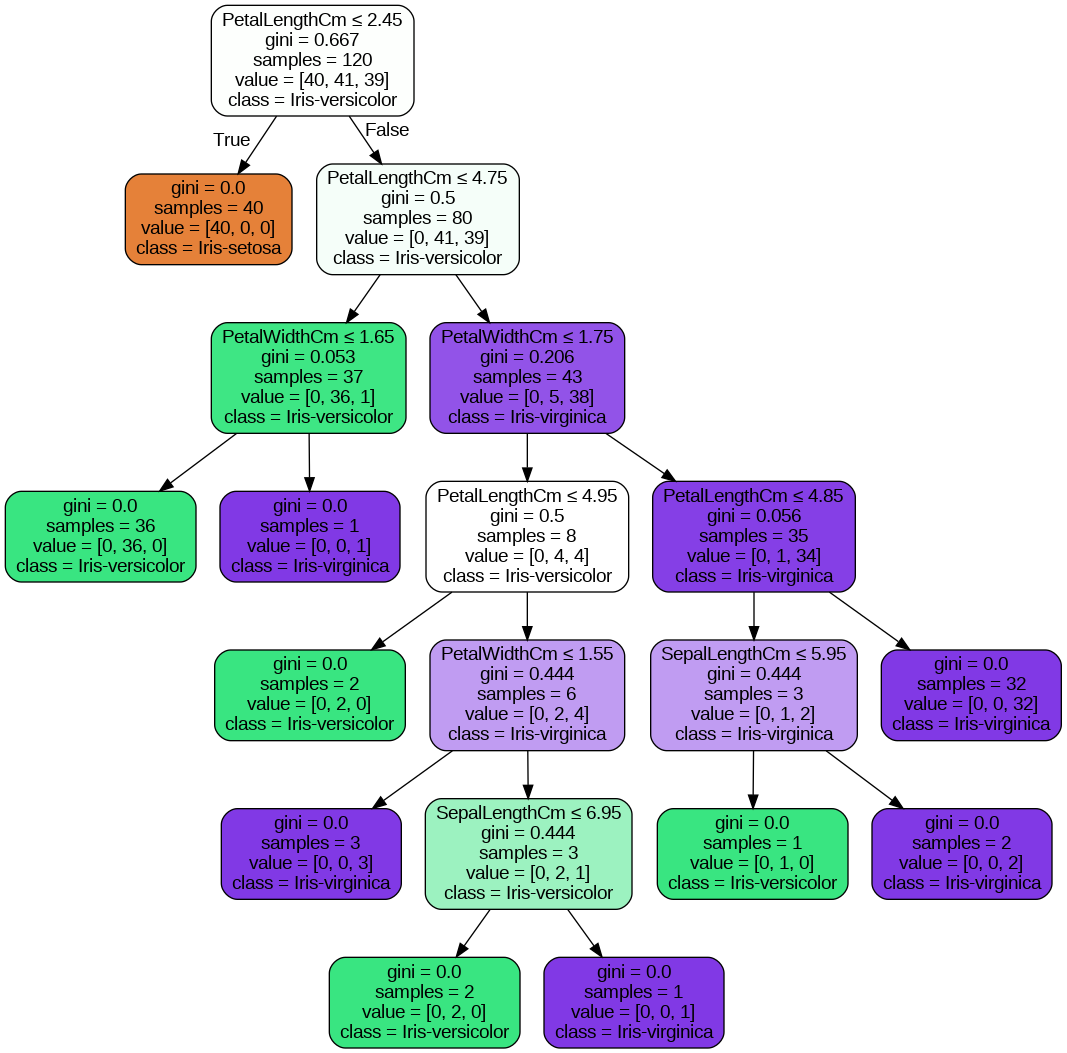

In [12]:
from IPython.display import Image

# Ganti 'iris_decision_tree.png' dengan nama file gambar yang telah Anda buat
Image(filename='iris_decision_tree.png')